# <font color='#d35400'> Lab 8 | Regression </font>
In this lab, we analyze a dataset called `mtcars`. The dataset comes from a 1974 issue of Motor Trend  US amagazine and contains fuel consumption and 10 aspects of automobile design and performance for 32 automobiles from 1973 to 1974. We perform exploratory data anlysis (EDA) on this dataset and then build a linear regression model.

<p align="center">
  <img src="chill_dog.jpg" alt="Alt Text", width="300"/>
</p>

## <font color = '#FF8C00'> Section 1 </font> | Loading the Data
In this section, we take the dataset in it's `.csv` format and convert it into a pandas data frame. We then standardize the features and characterize the dependent variable by plotting the ditribution over mpg and describe the range of values. 

- [x] Describe the original data and transformed data using head(), info(), and describe().
- [x] Standardize your features. You may do this ‘by hand’ or using StandardScaler from sklearn.preprocessing
- [x] Characterize the dependent variable – plot the distribution over mpg and describe the range of values

### <font color = '#FF8C00'> Converting `.csv` to Pandas Data Frame </font>
We start this section by taking in the `.csv` file and converting it into a pandas data frame. We then use `.head()`, `.info()` and `,describe()` to understand the dataset in better detail and look at the data types.

In [1]:
# importing pandas
import pandas as pd

# importing ipython display
from IPython.display import display

# converting .csv file to a pandas data frame
mountain_cars_df = pd.read_csv("C:/GitHub/DataScienceMachineLearning/wk_12/lab/mtcars.csv")

# renaming a column
mountain_cars_df = mountain_cars_df.rename(columns={'Unnamed: 0' : 'cars'})

# displaying the data frame
mountain_cars_df.head(5)

,cars,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [2]:
# displaying the information behind the data frame
display(mountain_cars_df.info())

# displaying the statistics behind the data frame
display(mountain_cars_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cars    32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


None

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


### <font color = '#FF8C00'> Converting Appropriate Features to Categorical </font>
Next, we look at the features and determine which ones are cetegorical and which ones aren't. The features are as follows:
- Categorical Features: `cyl`, `vs`, `am`, `gear` and `carb`
- Numerical Features: `mpg`, `disp`, `hp`, `drat`, `wt`, `qsec`

In [3]:
# grabbing all the categorical features
categorical_features = ['cyl', 'vs', 'am', 'gear', 'carb']

# setting the features as categorical data types
mountain_cars_df[categorical_features] = mountain_cars_df[categorical_features].astype('category')

# displaying the new information behind the data frame
display(mountain_cars_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   cars    32 non-null     object  
 1   mpg     32 non-null     float64 
 2   cyl     32 non-null     category
 3   disp    32 non-null     float64 
 4   hp      32 non-null     int64   
 5   drat    32 non-null     float64 
 6   wt      32 non-null     float64 
 7   qsec    32 non-null     float64 
 8   vs      32 non-null     category
 9   am      32 non-null     category
 10  gear    32 non-null     category
 11  carb    32 non-null     category
dtypes: category(5), float64(5), int64(1), object(1)
memory usage: 2.8+ KB


None

### <font color = '#FF8C00'> Standardizing the Features </font>
Next, we move on to standardizing the features. We achieve this using `StandardScaler`. After performing standardization, we then characterize the dependent variable by plotting the distribution over `mpg` and describing the range of values.

In [4]:
# importing the standard scaler library
from sklearn.preprocessing import StandardScaler

# filtering out the numeric columns
numerical_columns = mountain_cars_df.select_dtypes(include='number').columns

# initializing the standard scaler
scaler = StandardScaler()

# applying the standard scaler to the data frame
scaled_df = scaler.fit_transform(mountain_cars_df[numerical_columns])

# combining the data frames again
scaled_df = pd.DataFrame(scaled_df, columns=numerical_columns, index=mountain_cars_df.index)

# viewing the data frame
scaled_df.head(5)

,mpg,disp,hp,drat,wt,qsec
0,0.153299,-0.579750,-0.543655,0.576594,-0.620167,-0.789601
1,0.153299,-0.579750,-0.543655,0.576594,-0.355382,-0.471202
2,0.456737,-1.006026,-0.795570,0.481584,-0.931678,0.432823
3,0.220730,0.223615,-0.543655,-0.981576,-0.002336,0.904736
4,-0.234427,1.059772,0.419550,-0.848562,0.231297,-0.471202


In [5]:
# retrieving the object columns and combining them
non_numerical_columns = mountain_cars_df.select_dtypes(include=['object', 'category'])
new_mt_car_df = pd.concat([non_numerical_columns, scaled_df], axis=1)
new_mt_car_df = new_mt_car_df[mountain_cars_df.columns]

# viewing the scaled data frame
new_mt_car_df.head(5)

,cars,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,0.153299,6,-0.579750,-0.543655,0.576594,-0.620167,-0.789601,0,1,4,4
1,Mazda RX4 Wag,0.153299,6,-0.579750,-0.543655,0.576594,-0.355382,-0.471202,0,1,4,4
2,Datsun 710,0.456737,4,-1.006026,-0.795570,0.481584,-0.931678,0.432823,1,1,4,1
3,Hornet 4 Drive,0.220730,6,0.223615,-0.543655,-0.981576,-0.002336,0.904736,1,0,3,1
4,Hornet Sportabout,-0.234427,8,1.059772,0.419550,-0.848562,0.231297,-0.471202,0,0,3,2


### <font color = '#FF8C00'> Plotting the Distribution of `mpg` </font>
Lastly, we characterize tje dependent variable by plotting the distribution over mpg and describing the range of values.

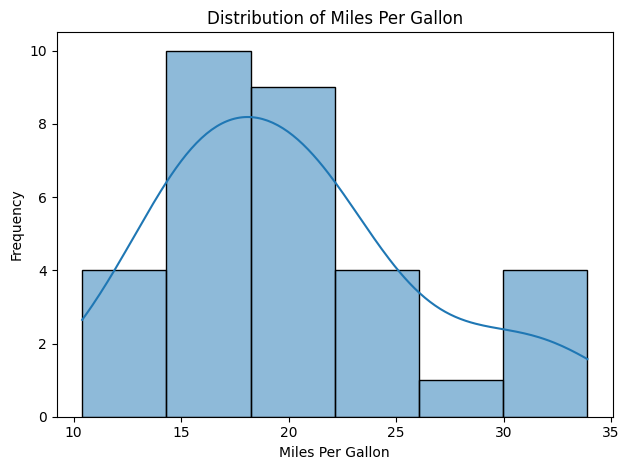

In [6]:
# importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# plotting out the histogram
sns.histplot(mountain_cars_df['mpg'], kde=True)
plt.title('Distribution of Miles Per Gallon')
plt.xlabel('Miles Per Gallon')
plt.ylabel('Frequency')
plt.tight_layout()

# saving the plot
plt.savefig('C:/GitHub/DataScienceMachineLearning/wk_12/plots/mpg.jpg', dpi=300)

# displaying the plot
plt.show()


## <font color = '#FF8C00'> Section 2 </font> | Exploratory Data Analysis
In this section, we work on exploring the relationships between each variable and mpg. We then use hypothesis testing to assess which variables show statistically significant association with the response variable. 
- [x] Explore the relationships between each variable and mpg – choose the appropriate plots based on the variable types (e.g., categorical, numerical, ordered).
- [x] Use hypothesis testing to assess which variables show statistically significant association with the response – use (α = 0.005).

### <font color = '#FF8C00'> Plotting Scatter Plots </font>
For comparing numerical features against numerical features, it would make the most sense to choose a scatter plot, as this would allow us to explore the relationship between two numerical features by looking at the best fit line. We start off by defining a function used to plot scatter plots and then move to plot them.

In [24]:
# function for plotting a sctter plot
def scatter_plot(feature_one, feature_two, dataframe, ax):
    sns.scatterplot(x=feature_one, y=feature_two, data=dataframe, ax=ax)
    ax.set_title(feature_one + " vs " + feature_two + " Scatterplot")
    ax.set_xlabel(feature_one)
    ax.set_ylabel(feature_two)

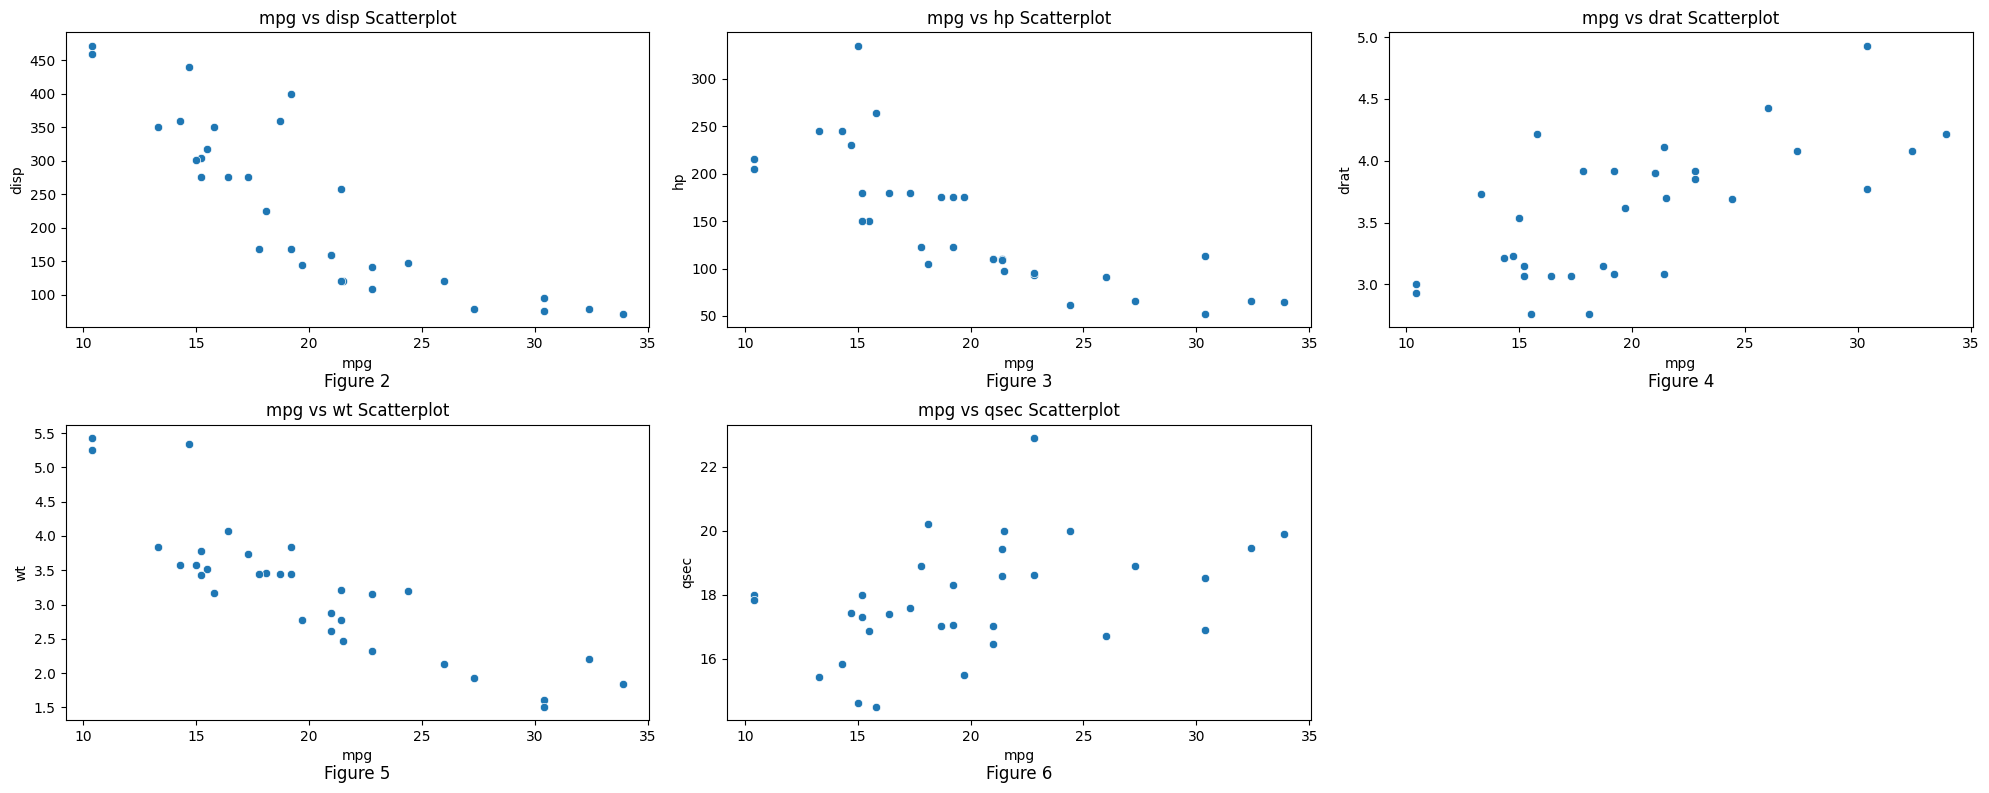

In [26]:
# setting the number of rows and columns
rows = 2
columns = 3

# creating the figure
fig, axes = plt.subplots(rows, columns, figsize=(20, 8)) 

# flatten the axes array
axes = axes.ravel()  

# setting a list of features of interest
numerical_features = ['disp', 'hp', 'drat', 'wt', 'qsec']


# using a for loop to greate the graph
for i, numerical_feature in enumerate(numerical_features):
    if i < len(axes):  
        scatter_plot('mpg', numerical_feature, mountain_cars_df,  axes[i])

        axes[i].text(
            0.5, -0.2,
            f"Figure {i+2}", 
            fontsize=12, 
            ha='center', 
            transform=axes[i].transAxes
        )

for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

# displaying the plots
plt.tight_layout()

# saving the plot
plt.savefig('C:/GitHub/DataScienceMachineLearning/wk_12/plots/mpgvsnumerical.jpg', dpi=300)

# displaying the plot
plt.show()

### <font color = '#FF8C00'> Plotting Violin Plots </font>
For comparing numerical features against categorical features, it would make the most sense to use a violin plot, as this would allow us to explore the relationship between the numerical and categorical features. We start off by defining a function used to plot violin plots and then move to plot them.

In [9]:
# function for plotting a sctter plot
def violin_plot(feature_one, feature_two, dataframe, ax):
    sns.violinplot(x=feature_one, y=feature_two, data=dataframe, ax=ax)
    ax.set_title(feature_one + " vs " + feature_two + " Scatterplot")
    ax.set_xlabel(feature_one)
    ax.set_ylabel(feature_two)

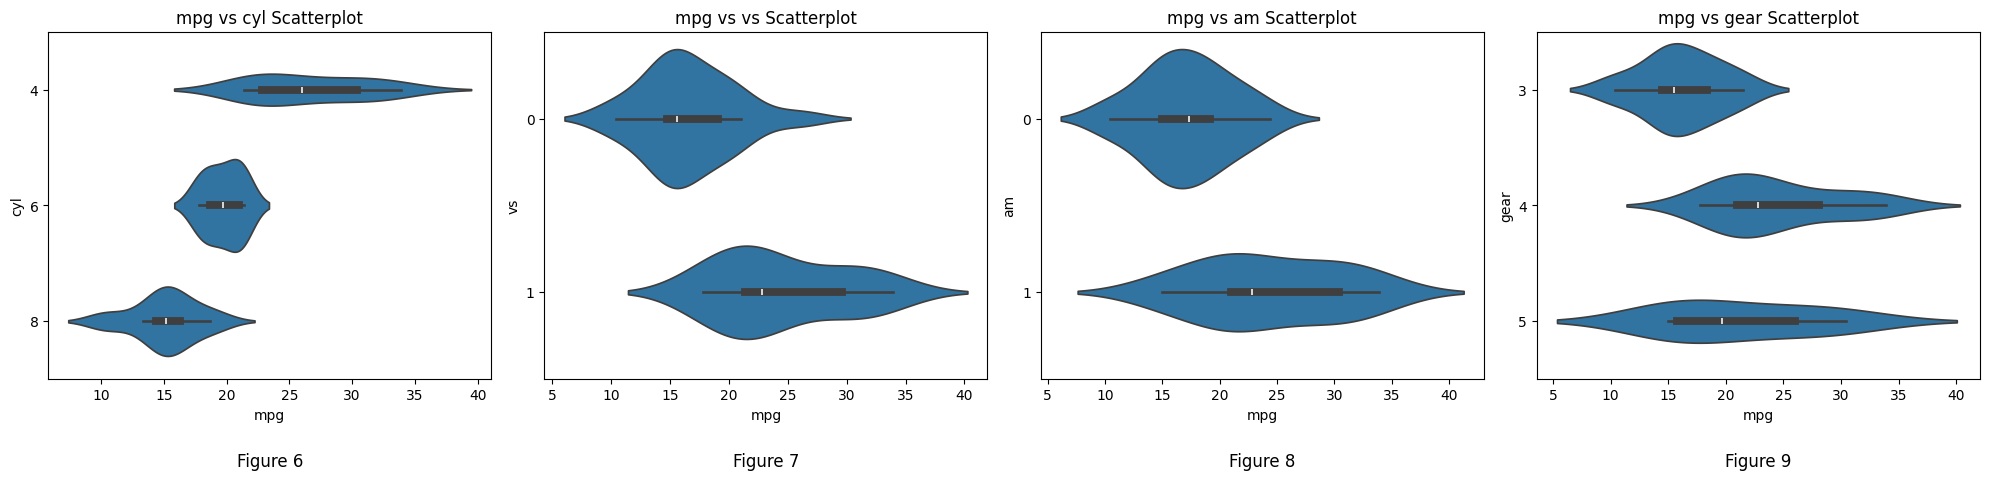

In [10]:
# setting the number of rows and columns
rows = 1
columns = 4

# creating the figure
fig, axes = plt.subplots(rows, columns, figsize=(20, 5)) 

# flatten the axes array
axes = axes.ravel()  

# setting a list of features of interest
categorical_features = ['cyl', 'vs', 'am', 'gear', 'carb']


# using a for loop to greate the graph
for i, categorical_feature in enumerate(categorical_features):
    if i < len(axes):  
        violin_plot('mpg', categorical_feature, mountain_cars_df,  axes[i])

        axes[i].text(
            0.5, -0.25,
            f"Figure {i+6}", 
            fontsize=12, 
            ha='center', 
            transform=axes[i].transAxes
        )

for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

# displaying the plots
plt.tight_layout()

# saving the plot
plt.savefig('C:/GitHub/DataScienceMachineLearning/wk_12/plots/mpgvscategorical.jpg', dpi=300)

# displaying the plot
plt.show()

### <font color = '#FF8C00'> Hypothesis Testing using Pearson's Correlation </font>
When it comes to hypothesis testing of numerical variables against each other, we decide on using pearson's correlation to measure the strength / direction of the linear relationship between two numerical variables. We start off by importing the `linregress` library.

In [20]:
# importing the linregress library
from scipy.stats import linregress

### <font color = '#FF8C00'> `mpg` vs `disp`, `hp`, `drat`, `wt` and `qsec`</font>
Next, we perform the pearson's correlation on all the numerical features against `mpg`. From here, we assess which variables show statistical significance association.


In [36]:
# setting up a list of numerical features of interest
numerical_list = ['disp', 'hp', 'drat', 'wt','qsec']

# declaring the bonferroni alpha
bonferroni_alpha = 0.005

# looping through the features to calculate the test statistic
for numerical_feature in numerical_list:
    p_value = linregress(scaled_df['mpg'], scaled_df[numerical_feature])
    if(p_value.pvalue < bonferroni_alpha):
        print(f"{numerical_feature} is statistically significant")
    else:
        print(f"{numerical_feature} is not statistically significant")

disp is statistically significant
hp is statistically significant
drat is statistically significant
wt is statistically significant
qsec is not statistically significant


### <font color = '#FF8C00'> Hypothesis Testing using Kruskal Wallis </font>
When it comes to hypothesis testing of categorical variables against a numerical variable, we decide on using kruskal wallis to measure to see whether atleast one one group defined by the categorical variable differs from atleast one another. We start off by importing the `kruskal` library.

In [28]:
# importing the kruskal library
from scipy.stats import kruskal

### <font color = '#FF8C00'> `mpg` vs `cyl`, `vs`, `am`, and `gear`</font>
Next, we perform the kruskal-wallis on all the categorical features against `mpg`. From here, we assess which features show statistical signifigance association.

In [37]:
# setting up a list of numerical features of interest
categorical_list = ['cyl', 'vs', 'am', 'gear']

# declaring the bonferroni alpha
bonferroni_alpha = 0.005

# looping through the features to calculate the test statistic
for categorical_feature in categorical_list:
    p_value = kruskal(mountain_cars_df['mpg'], mountain_cars_df[categorical_feature])
    if(p_value.pvalue < bonferroni_alpha):
        print(f"{categorical_feature} is statistically significant")
    else:
        print(f"{categorical_feature} is not statistically significant")

cyl is statistically significant
vs is statistically significant
am is statistically significant
gear is statistically significant


## <font color = '#FF8C00'> Section 3 </font> | Linear Regression Models
Next, we build three linear regression models using `LinearRegression` from `sklearn`. The first model is a baseline model with only an intercept, next is a model using features identified during exploratory data analysis, and the last model is a model created through greedy feature selection by sequentially adding variables that improve the adjusted R^2. We achieve this by doing the following:
- [x] Use LinearRegression from sklearn.linear model to create your regression models. To do this you will need to instantiate the model, ﬁt the model with the .ﬁt() method, and then generate predicted values with the .predict() method. Make sure you include an intercept in all models. Do not make a test-training split of any kind. Make all model comparisons using adjusted R2.
- [ ] For the best performant model, make a scatter plot between the model’s predicted mpg and the real mpg.
- [ ] For the best performant model, plot the residuals.

### <font color = '#FF8C00'> Baseline Model with an Intercept </font>
Here are the following deliverables required for this model:
- [x] Importing the necessary libraries for building the baseline model
- [x] Compute and compare the Root Mean-Squared Error (RMSE) for this model

In [42]:
# importing all required numpy libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,  mean_squared_error
import numpy as np

In [44]:
# setting up the target variable
y = scaled_df['mpg']

# the feature matrix
X = np.ones((len(scaled_df), 1))

# setting up the baseline model
model_one = LinearRegression(fit_intercept=False)

# fitting the model
model_one.fit(X, y)

# performing predictions
predictions = model_one.predict(X)

# finding the r2 value
r2 = r2_score(y, predictions)

# calculating the adjusted r2 value
adjusted_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - 0 - 1)

# calculating the root mean squared error
rmse = np.sqrt(mean_squared_error(y, predictions))

# printing out the results
print(f"The R squared value is {r2}")
print(f"The Adjusted R squared value is {adjusted_r2}")
print(f"The Root Mean Squared Value: {rmse}")


The R squared value is 0.0
The Adjusted R squared value is 0.0
The Root Mean Squared Value: 1.0


### <font color = '#FF8C00'> Models Using Predictive Variables </font>
For this model, we use a model that uses the variables that we identified as statistically significant and predictive in our exploratory data analysis. We then meet the following deliverables required for the model:
- [x] Compute and compare the Root Mean-Squared Error (RMSE) for this model


In [58]:
# a list of numerical and categorical features
numerical_features = ['disp', 'hp', 'drat', 'wt']
categorical_features = ['cyl', 'vs', 'am', 'gear']

# one hot encoding the categorical features
X_categorical = pd.get_dummies(mountain_cars_df[categorical_features], drop_first=True)
X_numerical = scaled_df[numerical_features]

# combining the categorical and numerical features
X_model = pd.concat([X_numerical, X_categorical], axis=1)
y_model = scaled_df['mpg']

# creating the fitting the model
model_two = LinearRegression()
model_two.fit(X_model, y_model)

# creating the predictions
predictions_two = model_two.predict(X_model)

# calculating the r2 value
r2_two = r2_score(y_model, predictions_two)
print(f"The R sqaured value is {r2}")

# calculating the adjusted r2 value
adjusted_r2_two = 1 - (1 - r2_two) * (len(y_model) - 1) / (len(y_model) - X_model.shape[1] - 1)
print(f"The Adjusted R squared value for Model Two {adjusted_r2_two}")

# calculating the root mean squared value
rmse_two = np.sqrt(mean_squared_error(y_model, predictions_two))
print(f"The Root Mean Squared Error for Model Two: {rmse_two}")

The R sqaured value is 0.0
The Adjusted R squared value for Model Two 0.8174307829023413
The Root Mean Squared Error for Model Two: 0.35167587528817534


### <font color = '#FF8C00'> Models Using Greedy Feature Selection </font>
For this model, we build it using a greedy feature selection by following the steps described in detail below:
- [x] Build a model for each variable individually
- [x] Sort the variables using adjusted R2
- [x] Starting with the baseline model, add each variable one at a time to the model. If variable improves the adjusted R2 over the last model, keep that variable in the model. If the variable does not improve the adjusted R2, do not keep that variable. At the end, you should have a single model with multiple variables
- [x] Compute and compare the Root Mean-Squared Error (RMSE) for this model


### <font color = '#FF8C00'> Building a Model for Each Variable Individually </font>
We start off by building a model for each variable individually. 

In [50]:
# creating the feature matrix
X_feature_matrix = pd.concat([X_numerical, X_categorical], axis=1)

# setting up the target variable and number of samples
y_1 = scaled_df['mpg']
samples = len(y_1)

# creating a list for features of interest
interested_features_list = []

# creating a list for all existing features
existing_features = list(X_feature_matrix.columns)

# storing the adjusted R2 values
adjusted_r2_scores = {}

# using a for loop for looping through the existing features
for existing_feature in existing_features:
    model = LinearRegression()
    model.fit(X_feature_matrix[[existing_feature]], y_1)
    y_prediction = model.predict(X_feature_matrix[[existing_feature]])
    r2_three = r2_score(y_1, y_prediction)
    r2_adjusted = 1 - (1 - r2_three) * (samples - 1) / (samples - 1 - 1)
    adjusted_r2_scores[existing_feature] = r2_adjusted

# printing out the adjusted R2 values
for feature, item in adjusted_r2_scores.items():
    print(f"Feature {feature} and Adjusted R2 Value {adjusted_r2_scores}")

Feature disp and Adjusted R2 Value {'disp': 0.7089547851727209, 'hp': 0.5891852528047319, 'drat': 0.44612834025125614, 'wt': 0.7445938867802068, 'cyl_6': -0.03233891130254918, 'cyl_8': 0.5355185934590496, 'vs_1': 0.4223126089866799, 'am_1': 0.3384589082063141, 'gear_4': 0.3144275117491715, 'gear_5': -0.02429270619500956}
Feature hp and Adjusted R2 Value {'disp': 0.7089547851727209, 'hp': 0.5891852528047319, 'drat': 0.44612834025125614, 'wt': 0.7445938867802068, 'cyl_6': -0.03233891130254918, 'cyl_8': 0.5355185934590496, 'vs_1': 0.4223126089866799, 'am_1': 0.3384589082063141, 'gear_4': 0.3144275117491715, 'gear_5': -0.02429270619500956}
Feature drat and Adjusted R2 Value {'disp': 0.7089547851727209, 'hp': 0.5891852528047319, 'drat': 0.44612834025125614, 'wt': 0.7445938867802068, 'cyl_6': -0.03233891130254918, 'cyl_8': 0.5355185934590496, 'vs_1': 0.4223126089866799, 'am_1': 0.3384589082063141, 'gear_4': 0.3144275117491715, 'gear_5': -0.02429270619500956}
Feature wt and Adjusted R2 Value 

### <font color = '#FF8C00'> Sorting the Variables using Adjusted R2 </font>
Next, we sort the variables using the adjusted R sqaured values

In [51]:
# sorting the dictionary items
sort = sorted(adjusted_r2_scores.items(), key=lambda x: x[1], reverse=True)

# initializing an empty list
sorted_variables = []

# looping through the sorted items and collecting just the feature names
for feature, score in sort:
    sorted_variables.append(feature)

# printing out the sorted variables
print(sorted_variables)

['wt', 'disp', 'hp', 'cyl_8', 'drat', 'vs_1', 'am_1', 'gear_4', 'gear_5', 'cyl_6']


### <font color = '#FF8C00'> Greedy Feature Selection </font>
Using our baseline model, we add each variable one at a time to the model. If the variable improves the adjusted R2 over the last model, we keep that variable in the model. If the variable doesn't improve the adjusted R2, we don't keep that variable. At the end, what we get is a single model with multiple variables.

In [54]:
# instantiating list of features and adjusted r2
final_new_features = []
best_adjusted_r2 = 0

# looping through each feature one by one
for feature in sorted_variables:

    # creating a model, performing predictions and calculating r2 and adjusted r2 values
    temp_feature_list = final_new_features + [feature]
    model = LinearRegression()
    model.fit(X_feature_matrix[temp_feature_list], y_1)
    y_prediction_new = model.predict(X_feature_matrix[temp_feature_list])
    r2_new = r2_score(y_1, y_prediction_new)
    adjusted_r2_final = 1 - (1 - r2_new) * (len(y_1) - 1) / (len(y_1) - len(temp_feature_list) - 1)

    # comparing new adjusted r2 against the best adjusted r2
    if(adjusted_r2_final > best_adjusted_r2):
        final_new_features.append(feature)
        best_adjusted_r2 = adjusted_r2_final

# printing out the new final features
print(f"New List of Final New Features: {final_new_features}")

New List of Final New Features: ['wt', 'disp', 'hp', 'drat', 'vs_1', 'am_1', 'cyl_6']


### <font color = '#FF8C00'> Computing the R2 Value for Greedy Feature Selection </font>
Now that we have the features that we're interested in, we now compute the root mean squared error as shown below:

In [57]:
# building the model and fitting it
last_final_model = LinearRegression()
last_final_model.fit(X_feature_matrix[final_new_features], y_1)

# performing predictions
final_prediction = last_final_model.predict(X_feature_matrix[final_new_features])

# calculating the adjusted R2 value
r2_final_final = r2_score(y_1, final_prediction)
adjusted_r2_final_final = 1 - (1 - r2_final_final) * (len(y_1) - 1) / (len(y_1) - len(final_new_features) - 1)

# calculating the root mean sqaured error
rmse_three = np.sqrt(mean_squared_error(y_1, final_prediction))

# printing out the root mean squared error
print(f"Root Mean Sqaured Error for Model Three: {rmse_three}")
print(f"Adjusted R2 for Model Three: {adjusted_r2_final_final}")


Root Mean Sqaured Error for Model Three: 0.35593136852629675
Adjusted R2 for Model Three: 0.8363624453278717


### <font color = '#FF8C00'> Creating a Scatter Plot </font>
For the best performant model, we make a scatter plot between the model's predicted `mpg` and the real `mpg`. For this, we select Model 3 because it has a higher adjusted R2, and while model 2 has a higher RMSE, the model 3 has a very similar RMSE so it doesn't matter.

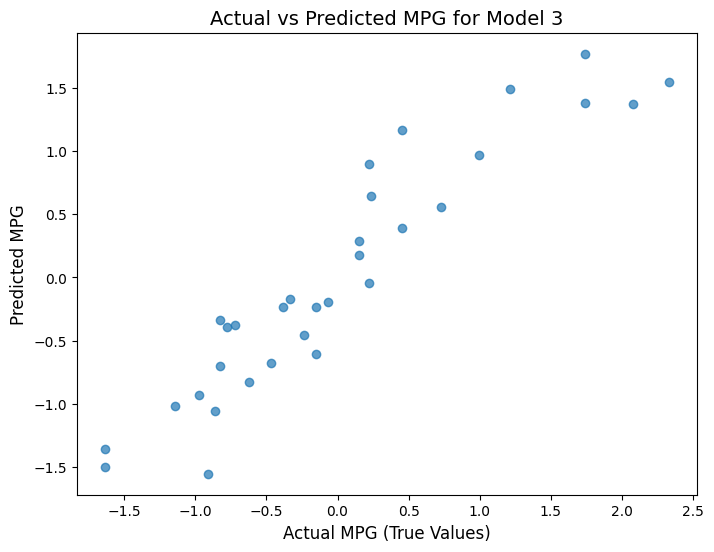

In [61]:
# retrieving the true and predicted values
y_true = scaled_df['mpg']
y_prediction = final_prediction

# creating a scatter plot
plt.figure(figsize=(8,6))
plt.scatter(y_true, y_prediction, alpha=0.7)

# Step 4: Labels and title
plt.xlabel('Actual MPG (True Values)', fontsize=12)
plt.ylabel('Predicted MPG', fontsize=12)
plt.title('Actual vs Predicted MPG for Model 3', fontsize=14)

# Step 5: Show plot
plt.show()

### <font color = '#FF8C00'> Plotting the Residuals </font>
We now create a residual plot to check if the model fits well.

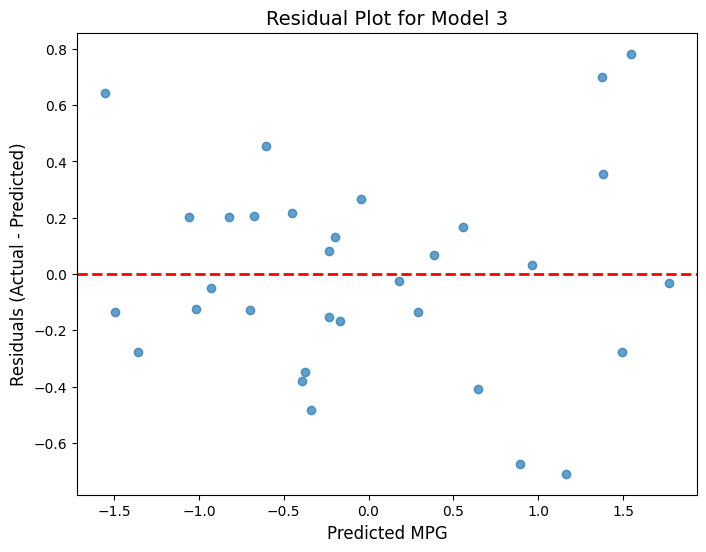

In [62]:
# calculating the residuals
residuals = y_true - y_prediction 

# Step 3: Create residual plot
plt.figure(figsize=(8,6))
plt.scatter(y_prediction, residuals, alpha=0.7)

# ploting a residual line
plt.axhline(0, color='red', linestyle='--', linewidth=2)

# adding in the titles and axis labels
plt.xlabel('Predicted MPG', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.title('Residual Plot for Model 3', fontsize=14)

# displaying the plot
plt.show()

## <font color = '#FF8C00'> Section 4 </font> | 
